In [70]:
from __future__ import (absolute_import, print_function, division, unicode_literals)
from ema_workbench import (Model, RealParameter, CategoricalParameter, ScalarOutcome, Constant,\
                           Policy, perform_experiments, ema_logging, \
                           TimeSeriesOutcome, perform_experiments,save_results, load_results)
#from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS
from ema_workbench.analysis import (clusterer, plotting, Density, pairs_plotting, get_ex_feature_scores, \
                                    RuleInductionType, feature_scoring)
from ema_workbench.analysis import scenario_discovery_util as sdutil
from ema_workbench.analysis.plotting_util import do_titles,do_ylabels, TIME
import ema_workbench.analysis.plotting_util as plt_util
from ema_workbench.analysis.plotting import group_by_envelopes, single_envelope, plot_lines_with_envelopes, prepare_data 
from ema_workbench.analysis.plotting import simple_kde, group_density, plot_envelope, simple_density
from ema_workbench.analysis.plotting import lines, envelopes, kde_over_time, multiple_densities
from ema_workbench.analysis.pairs_plotting import pairs_scatter, pairs_density
import ema_workbench.analysis.cart as cart
from ema_workbench.analysis.pairs_plotting import (pairs_lines, pairs_scatter,pairs_density)
import numpy as np
import seaborn as sns #; sns.set(style="ticks", color_codes=True)
import pandas as pd
import matplotlib.pyplot as plt
TIME_LABEL = 'Time'

import importlib
importlib.reload(sdutil)
importlib.reload(cart)

import itertools
import datetime
import math
import matplotlib.gridspec as gridspec
import scipy.stats.kde as kde
from matplotlib.colors import ColorConverter
from matplotlib.collections import PolyCollection, PathCollection
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie
from matplotlib.ticker import FormatStrFormatter, FuncFormatter
from matplotlib.patches import ConnectionPatch
import matplotlib.font_manager as fm
import matplotlib as mpl

In [71]:
def clustering (column, nr_of_clusters, cluster_name):
    dataset = outcomes
    expdata = experiments

    data = dataset[column]
    distances = clusterer.calculate_cid(data)
    
    # calcuate distances
    distances = clusterer.calculate_cid(data)
    
    # do agglomerative clustering on the distances
    clusters = clusterer.apply_agglomerative_clustering(distances, n_clusters=nr_of_clusters)
    
    # show the clusters in the output space
    x = expdata.copy()
    x[cluster_name] = clusters.astype('object')
    
    return (x)

In [72]:
def plot_clusters (column,x, cluster_name, zero = False,ylabel = False, alpha = None, title=False):
    dataset = outcomes
    expdata = experiments
    
    if title:
    #plot the clusters
        lines(x, dataset,group_by = cluster_name,outcomes_to_show = column,
        density=Density.KDE, titles=title)
    else:
        lines(x, dataset,group_by = cluster_name,outcomes_to_show = column,
        density=Density.KDE)
    fig = plt.gcf()
    ax = fig.get_axes()
    ax[0].set_xticklabels(labels_time)
    fig.set_size_inches(7,5)
    
    if alpha:
        for line in ax[0].get_lines():
            line.set_alpha(alpha)
    #layout
    plt.margins(0)
    sns.despine()
    if zero == True:
        ax[0].set_ylim([0,None])
        ax[0].set_xticklabels(labels_time)
    if ylabel:
        ax[0].set(ylabel=ylabel)
    change_fontsize(fig)
    sns.despine()
    # save_fig(fig,wd,'clustering'+paradigm+column)
    
    return fig,ax

In [73]:
def change_fontsize(fig, fs=11.5):
    '''Change fontsize of figure items to specified size'''
    for ax in fig.axes:
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(fs)
        try:
            parasites = ax.parasites
        except AttributeError:
            pass
        else:
            for parisite in parasites:
                for axis in parisite.axis.values():
                    axis.major_ticklabels.set_fontsize(fs)
                    axis.label.set_fontsize(fs)
            for axis in ax.axis.values():
                axis.major_ticklabels.set_fontsize(fs)
                axis.label.set_fontsize(fs)
        if ax.legend_ != None:
            for entry in ax.legend_.get_texts():
                entry.set_fontsize(fs)
        for entry in ax.texts:
            entry.set_fontsize(fs)
        for entry in ax.tables:
            entry.set_fontsize(fs)

In [74]:
labels_time = [2000, 2010, 2020, 2030, 2040, 2050]
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['legend.frameon'] = False

In [75]:
results = load_results('Results/Model_runs.tar.gz')
experiments, outcomes = results

## Clustering runs

In [76]:
clustered_wind = clustering('Total wind capacity in use', 3, 'Wind_cluster')

In [77]:
clustered_wind['Wind_cluster'][clustered_wind['Wind_cluster'] == 0] = 'Low' 
clustered_wind['Wind_cluster'][clustered_wind['Wind_cluster'] == 1] = 'Medium' 
clustered_wind['Wind_cluster'][clustered_wind['Wind_cluster'] == 2] = 'High'

C:\Users\User\AppData\Local\Temp\ipykernel_820\3689677891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_wind['Wind_cluster'][clustered_wind['Wind_cluster'] == 0] = 'Low'
C:\Users\User\AppData\Local\Temp\ipykernel_820\3689677891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_wind['Wind_cluster'][clustered_wind['Wind_cluster'] == 1] = 'Medium'
C:\Users\User\AppData\Local\Temp\ipykernel_820\3689677891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

C:\Users\User\AppData\Local\Temp\ipykernel_820\785550374.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels_time)
C:\Users\User\AppData\Local\Temp\ipykernel_820\785550374.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels_time)


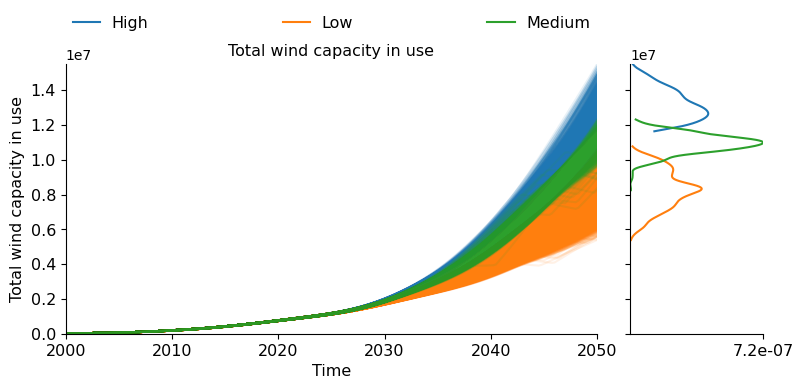

In [78]:
plot_clusters ('Total wind capacity in use',clustered_wind, 'Wind_cluster', zero = True, alpha=0.1)
fig = plt.gcf()
fig.set_size_inches(9,3.5)

In [79]:
clustered_ev = clustering('Total cars in use',3, 'EV_cluster')
clustered_ev['EV_cluster'][clustered_ev['EV_cluster'] == 0] = 'High' 
clustered_ev['EV_cluster'][clustered_ev['EV_cluster'] == 1] = 'Medium'
clustered_ev['EV_cluster'][clustered_ev['EV_cluster'] == 2] = 'Low' 

C:\Users\User\AppData\Local\Temp\ipykernel_820\862838610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_ev['EV_cluster'][clustered_ev['EV_cluster'] == 0] = 'High'
C:\Users\User\AppData\Local\Temp\ipykernel_820\862838610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_ev['EV_cluster'][clustered_ev['EV_cluster'] == 1] = 'Medium'
C:\Users\User\AppData\Local\Temp\ipykernel_820\862838610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

C:\Users\User\AppData\Local\Temp\ipykernel_820\785550374.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels_time)
C:\Users\User\AppData\Local\Temp\ipykernel_820\785550374.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels_time)


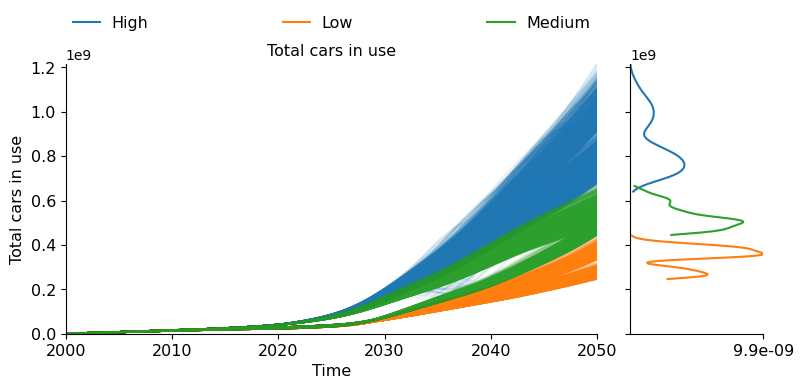

In [80]:
plot_clusters ('Total cars in use',clustered_ev, 'EV_cluster', zero = True, alpha=0.1)
fig = plt.gcf()
fig.set_size_inches(9,3.5)

In [81]:
clustered_Nd = clustering('Total demand REE[Neodymium]', 3, 'Nd_cluster')
clustered_Nd['Nd_cluster'][clustered_Nd['Nd_cluster'] == 0] = 'Medium'
clustered_Nd['Nd_cluster'][clustered_Nd['Nd_cluster'] == 1] = 'Low'
clustered_Nd['Nd_cluster'][clustered_Nd['Nd_cluster'] == 2] = 'High' 

C:\Users\User\AppData\Local\Temp\ipykernel_820\3039386654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_Nd['Nd_cluster'][clustered_Nd['Nd_cluster'] == 0] = 'Medium'
C:\Users\User\AppData\Local\Temp\ipykernel_820\3039386654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_Nd['Nd_cluster'][clustered_Nd['Nd_cluster'] == 1] = 'Low'
C:\Users\User\AppData\Local\Temp\ipykernel_820\3039386654.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

C:\Users\User\AppData\Local\Temp\ipykernel_820\785550374.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels_time)
C:\Users\User\AppData\Local\Temp\ipykernel_820\785550374.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels_time)


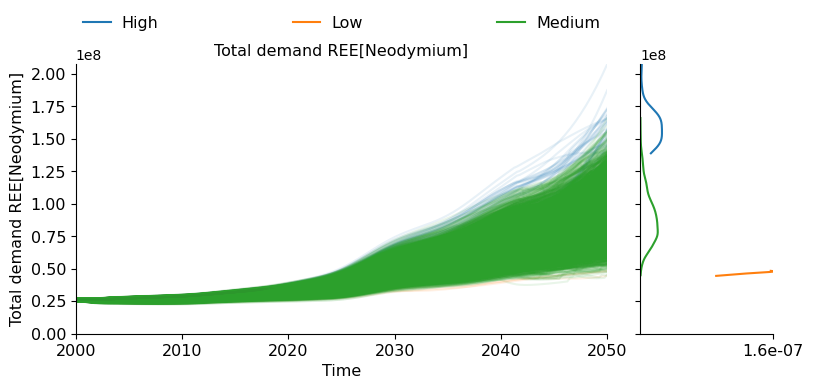

In [82]:
plot_clusters ('Total demand REE[Neodymium]',clustered_Nd, 'Nd_cluster', zero = True, alpha=0.1)
fig = plt.gcf()
fig.set_size_inches(9,3.5)

In [83]:
clustered_Dy = clustering('Total demand REE[Dysprosium]', 3, 'Dy_cluster')
clustered_Dy['Dy_cluster'][clustered_Dy['Dy_cluster'] == 0] = 'High'
clustered_Dy['Dy_cluster'][clustered_Dy['Dy_cluster'] == 1] = 'Medium'
clustered_Dy['Dy_cluster'][clustered_Dy['Dy_cluster'] == 2] = 'Low'

C:\Users\User\AppData\Local\Temp\ipykernel_820\3137944646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_Dy['Dy_cluster'][clustered_Dy['Dy_cluster'] == 0] = 'High'
C:\Users\User\AppData\Local\Temp\ipykernel_820\3137944646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_Dy['Dy_cluster'][clustered_Dy['Dy_cluster'] == 1] = 'Medium'
C:\Users\User\AppData\Local\Temp\ipykernel_820\3137944646.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

C:\Users\User\AppData\Local\Temp\ipykernel_820\785550374.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels_time)
C:\Users\User\AppData\Local\Temp\ipykernel_820\785550374.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels_time)


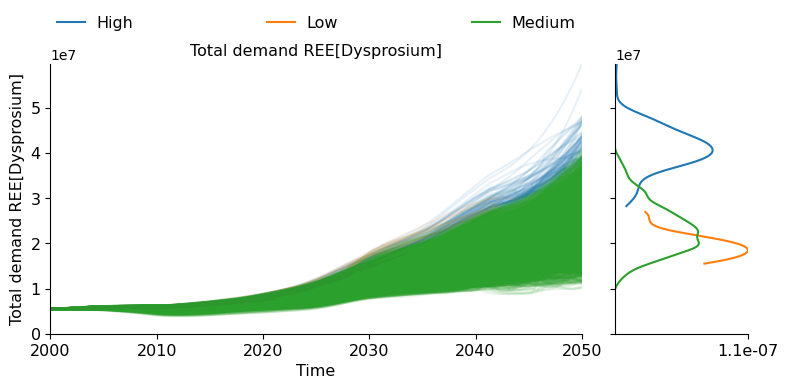

In [84]:
plot_clusters ('Total demand REE[Dysprosium]',clustered_Dy, 'Dy_cluster', zero = True, alpha=0.1)
fig = plt.gcf()
fig.set_size_inches(9,3.5)

In [85]:
experiments["EV clusters"] = clustered_ev['EV_cluster']
experiments["Wind clusters"] = clustered_wind['Wind_cluster']
experiments["Nd clusters"] = clustered_Nd['Nd_cluster']
experiments["Dy clusters"] = clustered_Dy['Dy_cluster']

In [86]:
experiments

,"""High coercive magnet-for-magnet substitution threshold""","""Low coercive magnet-for-magnet substitution threshold""",Decay factor,Fraction extra production costs for a lower magnet content,Long term substitution strength,Maximum decrease production capacity,Maximum increase production capacity,Minimum price of illegal mining,Minimum stock transit time,Price elasticity long term,...,Uncertainty factor share offshore wind,Uncertainty factor weight NdFeB in application,scenario,policy,model,EV clusters,Wind clusters,Nd clusters,Dy clusters,CET clusters
0,2.025604,1.889335,0.034014,0.345206,0.155599,0.019005,0.148382,2.892218,0.198147,0.147090,...,1.034473,0.925832,0,NaN,Vensim,Medium,Low,Medium,Medium,High
1,2.067814,1.658428,0.017870,0.394782,0.112812,0.048905,0.168951,2.709175,0.078288,0.186448,...,1.120689,1.089837,1,NaN,Vensim,Low,Low,Medium,Medium,Medium
2,3.872792,2.240740,0.013302,0.483339,0.076461,0.027879,0.186771,3.350328,0.266890,0.145812,...,1.187463,1.182127,2,NaN,Vensim,Low,Low,High,High,Medium
3,2.517965,2.346818,0.026045,0.363624,0.093461,0.044930,0.109557,2.783223,0.100040,0.138169,...,1.122889,0.799653,3,NaN,Vensim,Low,Low,Medium,Medium,Medium
4,2.077159,2.959326,0.035287,0.322819,0.058145,0.021995,0.102003,2.986915,0.256178,0.138768,...,0.991803,0.729413,4,NaN,Vensim,High,Low,Medium,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.477932,2.396164,0.010264,0.214209,0.169360,0.045804,0.176213,3.835154,0.298781,0.149254,...,0.735588,0.939902,4995,NaN,Vensim,Medium,Low,Medium,Medium,High
4996,3.492269,2.313987,0.013072,0.334926,0.069767,0.029015,0.164277,1.828257,0.052192,0.167560,...,1.032526,0.762837,4996,NaN,Vensim,High,Low,Medium,Medium,Medium
4997,3.755378,2.536060,0.010397,0.215751,0.160265,0.041283,0.136257,3.820766,0.169745,0.127973,...,1.227145,1.065716,4997,NaN,Vensim,High,Low,Medium,Medium,Medium
4998,2.624646,2.964422,0.045918,0.301198,0.095394,0.043570,0.119845,2.245540,0.059810,0.179425,...,0.993243,0.817132,4998,NaN,Vensim,Low,Low,Medium,Medium,Medium


## Defining some outcomes

In [87]:
results = experiments, outcomes

In [88]:
save_results(results, 'Results/Model_runs.tar.gz')

C:\Users\User\anaconda3\Lib\site-packages\ema_workbench\em_framework\outcomes.py:541: UserWarning: still to be tested!!
  warnings.warn("still to be tested!!")
